# Calculating emps and dilution in ANHA4-EXH001

In [3]:
import sys
sys.path.insert(0, '_libs/')

In [4]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
ptrc_obj = nc.Dataset('_data\EXP14_1h_20100101_20100101_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

# emps calculations

In [4]:
ANHA4_obj = nc.Dataset('_data\ANHA4-EXH001_icemod_y2014m08d13.nc')
safl=ANHA4_obj.variables['iocesafl'][:]
salin=ANHA4_obj.variables['isssalin'][:]
nav_lat=ANHA4_obj.variables['nav_lat'][:]
nav_lon=ANHA4_obj.variables['nav_lon'][:]

## iocesafl

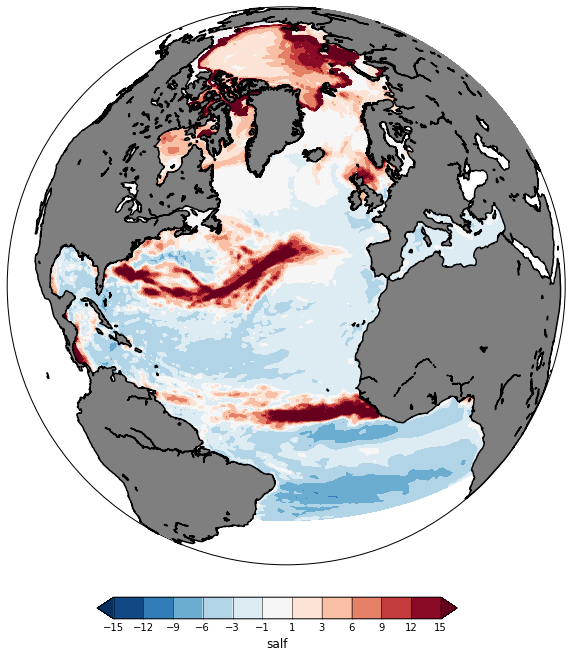

In [5]:
lev = [-15, -12, -9, -6, -3, -1, 1, 3, 6, 9, 12, 15]
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, safl[0, :, :], lev, cmap=plt.cm.RdBu_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('salf', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

## isssalin

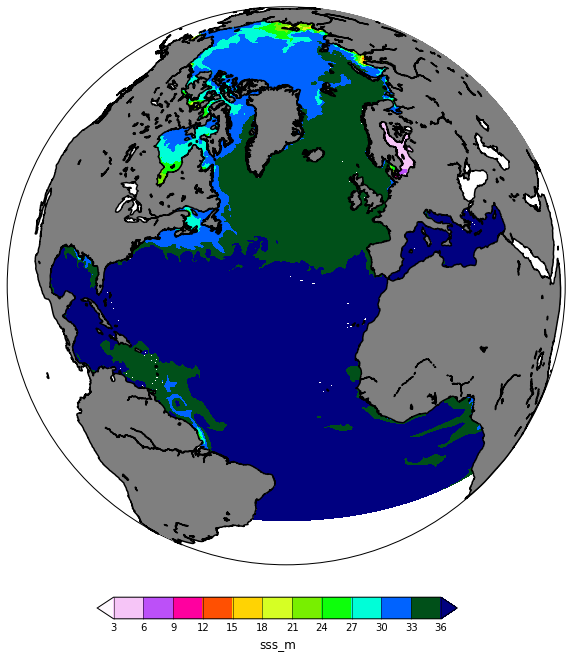

In [6]:
lev = np.arange(3, 38, 3)
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, salin[0, :, :], lev, cmap=plt.cm.gist_ncar_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('sss_m', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

In [7]:
emps=-1.0*safl[0, :, :]*34.7/(3600.0*4*(salin[0, :, :]+1.0e-16))

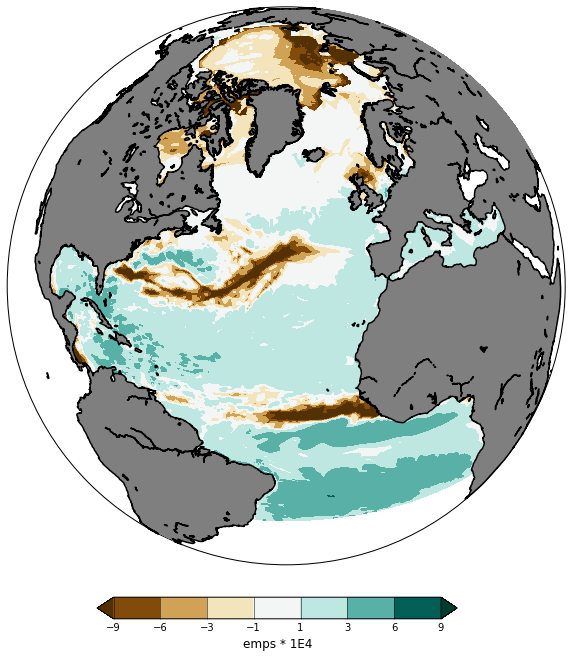

In [8]:
lev = np.array([-9, -6, -3, -1, 1, 3, 6, 9])
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

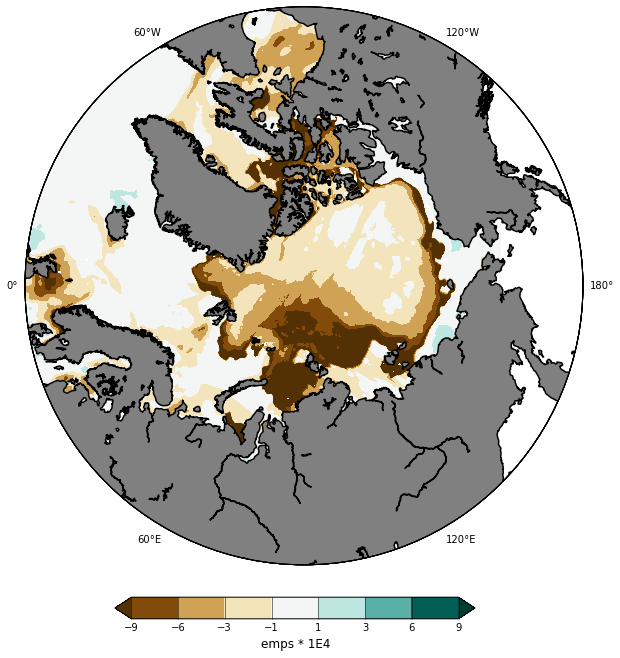

In [20]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

# Comparing two dilution algorithmes

* Plan A: ```dilution = (source(:, :) - trb(:, :))*rnf(:, :)```
* Plan B: ```emp = emp + rnf```
* 6000 timepsteps

In [5]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP01_5d_20100101_20100316_ptrc_T.nc')
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [8]:
L = 0
lev3 = [-0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65]

In [9]:
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP01_5d_20100101_20100316_ptrc_T.nc')
Ba1 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba1 = ptrc_obj.variables['Ba'][:, 0, 600, 450]
Ob_d18O1 = ptrc_obj.variables['d18O'][:, 0, 600, 450]
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP03_5d_20100101_20100316_ptrc_T.nc')
Ba2 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba2 = ptrc_obj.variables['Ba'][:, 0, 600, 450]
Ob_d18O2 = ptrc_obj.variables['d18O'][:, 0, 600, 450]

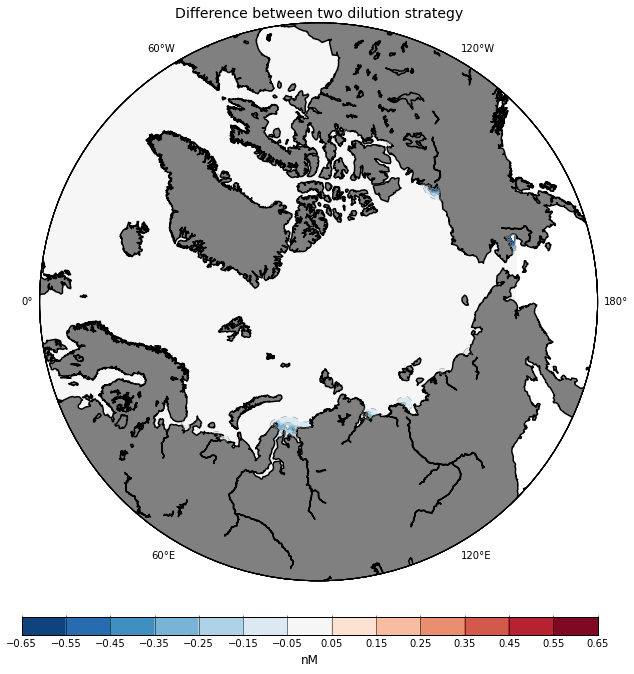

In [14]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba1[L, :, :]-Ba2[L, :, :], lev3, cmap=plt.cm.RdBu_r)
proj.contour(x, y, Ba1[L, :, :]-Ba2[L, :, :], lev3, linewidths=0.5, colors=('gray',))
cax = fig.add_axes([0.1, 0.05, 0.8, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev3)
ax.set_title('Difference between two dilution strategy', fontsize=14)

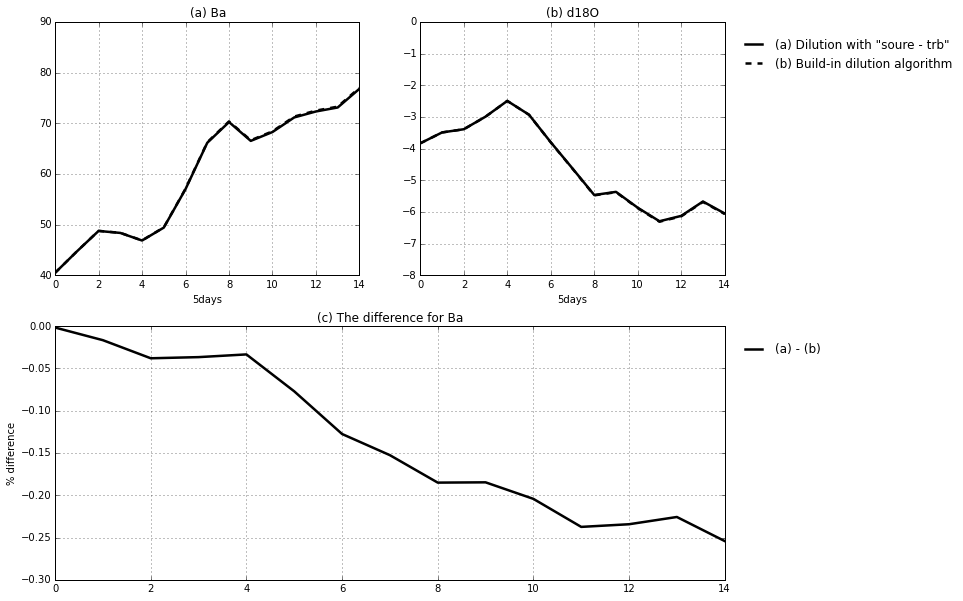

In [24]:
fig=plt.figure(figsize=(12, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2, rowspan=1)
ax1.grid(); ax2.grid(); ax3.grid()

ax1.plot(Ob_Ba1, 'k-', linewidth=2.5, label='(a) Dilution with "soure - trb"')
ax1.plot(Ob_Ba2, 'k--', linewidth=2.5, label='(b) Build-in dilution algorithm')
ax1.set_ylim(40, 90); ax1.set_title('(a) Ba'); ax1.set_xlabel('5days')

ax2.plot(Ob_d18O1, 'k-', linewidth=2.5, label='(a) Dilution with "soure - trb"')
ax2.plot(Ob_d18O2, 'k--', linewidth=2.5, label='(b) Build-in dilution algorithm')
ax2.set_ylim(-8, 0); ax2.set_title('(b) d18O'); ax2.set_xlabel('5days')

ax3.plot((Ob_Ba1-Ob_Ba2)/Ob_Ba1*100, 'k-', lw=2.5, label='(a) - (b)')
ax3.set_ylabel('% difference'); ax3.set_title('(c) The difference for Ba')

LG=ax2.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 
LG=ax3.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 